Author: Ni Made Sri Kumala Dewi Oka

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Load Dataset**

In [2]:
df_loan = pd.read_csv('loan_customer.csv')
# melihat cuplikan data
df_loan.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE


# **2. Data Exploration**

#### Describe Data

In [3]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

Pada penggambaran informasi data di atas, terlihat bahwa terdapat total 17 kolom, 621 baris data, serta terdapat data yang hilang pada beberapa features dan kesalahan tipe data pada features birth_date dan phone_number.

Definisi kolom:

1. loan_id: Nomor identitas unik untuk setiap nasabah
2. birth_date: Tanggal lahir dari setiap nasabah
3. gender: jenis kelamain nasabah (Female, Male)
4. phone_number: No telpon dari setiap nasabah
5. married: apakah nasabah sudah menikah (Yes, No)
6. dependents: berapa jumlah tanggungan nasabah (Nilai 0: tidak memiliki tanggungan, Nilai 1: memiliki 1 tanggungan, Nilai 2: memiliki 2 tanggungan, Nilai 3+: memiliki tanggungan >3)
7. education: apakah nasabah sudah menyelesaikan pendidikannya (Not Graduate, Graduate )
8. self_employed: apakah nasabah seorang karyawan (No, Yes)
9. applicant_income: berapa jumlah pendapatan yang dimiliki oleh nasabah
10. coapplicant_income: berapa jumlah pendapatan gabungan yang dimiliki oleh nasabah
11. loan_amount: berapa jumlah pinjaman yang diajukan oleh nasabah
12. loan_term_month: berapa jangka waktu (Bulan) nasabah mengajukan masa peminjaman
13. loan_term_year: berapa jangka waktu (tahun) nasabah mengajukan masa peminjaman
14. credit_history: apakah nasabah pernah melakukan peminjaman sebelumnya (Nilai 0: tidak pernah meminjam, Nilai 1: pernah meminjam)
15. has_credit_card: apakah nasabah memiliki kartu kredit (Nilai 0: nasabah memiiki kartu kredit, Nilai 1: nasabah tidak memiliki kartu kredit)
16. propert_type: tipe properti yang diminati oleh pelanggan(studio, house, apartmen)
17. loan_status: apakah pengajuan peminjaman nasabah diterima oleh bank (APPROVE, REJECT) 

In [4]:
# Informasi banyaknya missing values di tiap feature
df_loan.isnull().sum().reset_index()

,index,0
0,loan_id,0
1,birth_date,49
2,phone_number,52
3,gender,13
4,married,3
5,dependents,16
6,education,1
7,self_employed,33
8,applicant_income,9
9,coapplicant_income,0


Pada tabel di atas, terlihat banyak features yang memiliki missing values / Null. Terutama pada features has_credit_card

#### Pendekatan Numerik

In [59]:
# memisahkan feature berdasarkan jenisnya untuk dianalisis
num = ['applicant_income', 'coapplicant_income', 'loan_amount', 'loan_term_month', 'loan_term_year', 'credit_history']
cat = ['gender', 'married', 'dependents', 'education', 'self_employed','property_type']

In [60]:
df_loan[num].describe()

,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history
count,612.000000,621.000000,621.000000,621.000000,621.000000,570.000000
mean,5681.549020,1616.874267,145133.655395,342.608696,28.550725,0.842105
std,9056.454103,2915.075138,84011.115879,64.090837,5.340903,0.364963
min,150.000000,0.000000,9000.000000,12.000000,1.000000,0.000000
25%,2874.500000,0.000000,100000.000000,360.000000,30.000000,1.000000
50%,3812.500000,1167.000000,125000.000000,360.000000,30.000000,1.000000
75%,5815.750000,2302.000000,165000.000000,360.000000,30.000000,1.000000
max,170578.000000,41667.000000,700000.000000,480.000000,40.000000,1.000000


Berdasarkan tabel di atas, terlihat ada data yang secara statistik memiliki ketimpangan yang jauh. Seperti pada applicant_income yang memiliki mean jauh di atas nilai mediannya, serta nilai max dan min yang cukup berjauhan. Semua feature memiliki masukan data yang sesuai yaitu sebanyak 621 data.

In [56]:
df_loan[cat].describe()

,gender,married,dependents,education,self_employed,property_type
count,608,618,605,620,588,620
unique,2,2,4,2,2,3
top,Male,Yes,0,Graduate,No,apartment
freq,495,403,349,485,506,235


Pada penggambaran di atas, tampak bahwa data kategoris bersifat wajar yang ditandai dengan jumlah nilai unique tiap features. Terlihat bahwa pada features categorical memiliki masukan data kurang dari 621, sehingga dapat dikatakan terdapat missing values pada features ini.

#### Pendekatan Grafis: Univariate Analysis

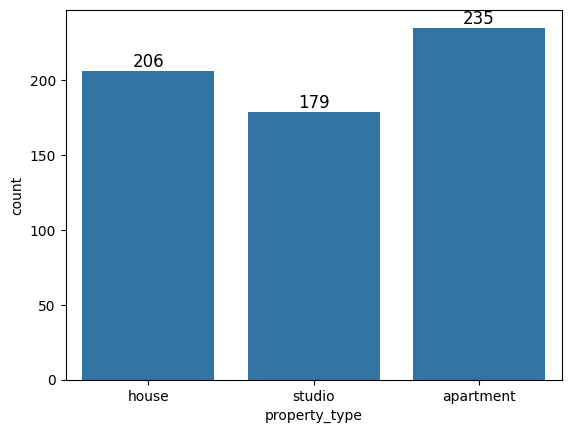

In [52]:
ax = sns.countplot(df_loan,x='property_type')

for bar in ax.patches:
  bar_value = bar.get_height()
  text = f'{bar_value:.0f}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value
  bar_color = bar.get_facecolor()
  ax.text(text_x,text_y, text, ha='center', va='bottom', color='black', size = 12)

plt.show()

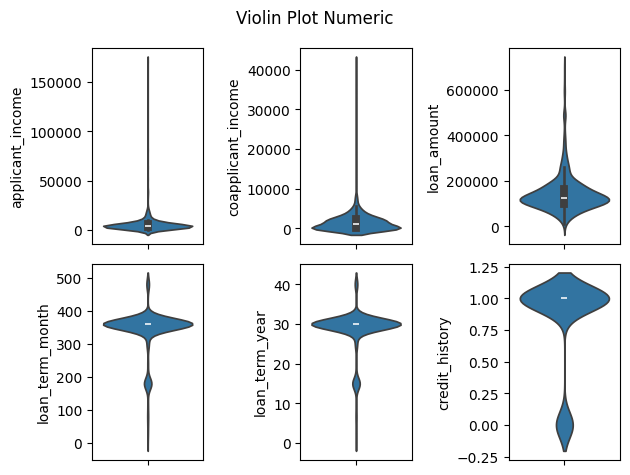

In [61]:
ig,ax = plt.subplots(nrows=2,ncols=3)
for i,col in enumerate(num):
    ii = i // 3
    jj = i %  3
    sns.violinplot(df_loan,y=col,ax=ax[ii][jj])

plt.suptitle('Violin Plot Numeric')
plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, terlihat bahwa distribusi feature applicant_income, coapplicant_income, dan loan_amount bersifat negatively skewed sedangkan loan_term_month dan loan_term_year bersifat positively skewed. Terlihat pula ada lonjakan kecil pada feature loan_term_month dan loan_term_year

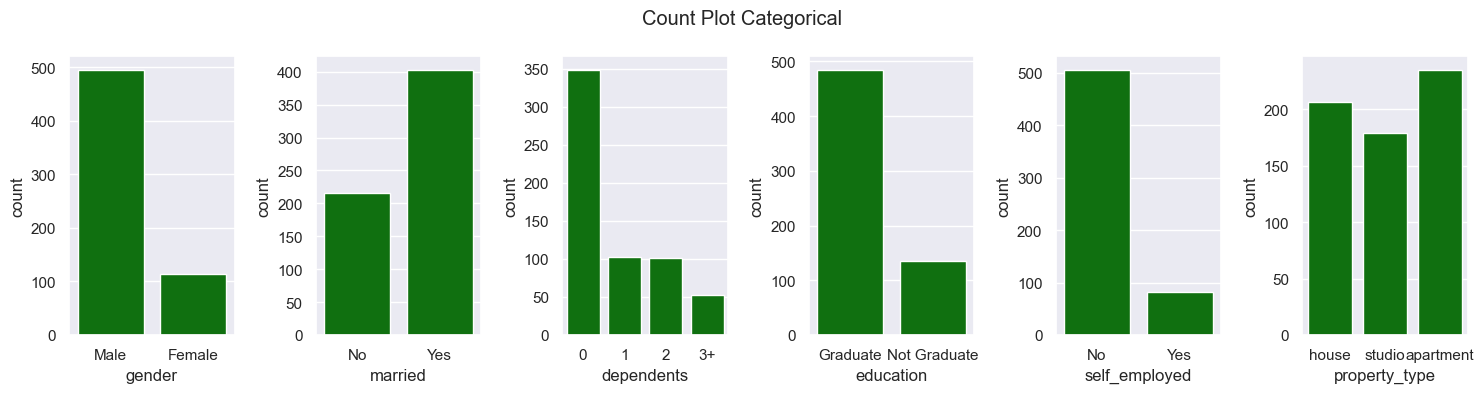

In [70]:
plt.figure(figsize=(15,4))
for i in range (0, len(cat)):
    plt.subplot(1,len(cat), i+1)
    sns.countplot(x=df_loan[cat[i]], color='green')
    plt.suptitle('Count Plot Categorical')
    plt.tight_layout()


Berdasarkan grafik di atas, tampak bahwa setiap feataure memiliki distribusi data yang cukup timpang kecuali feature married.

#### Pendekatan Grafis: Multivariate Analysis

<Axes: >

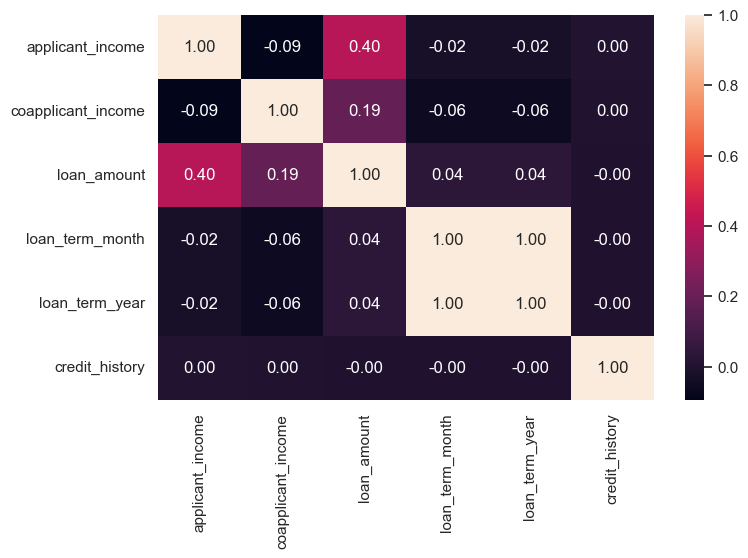

In [74]:
plt.figure(figsize=(8,5))
sns.heatmap(df_loan[num].corr(),annot=True,fmt=".2f")

Dari grafik Heatmap tersebut, terlihat feature loan_term_month dan loan_term_year memiliki korelasi yang kuat, hal ini mengartikan kemungkinan besar feature ini redundan

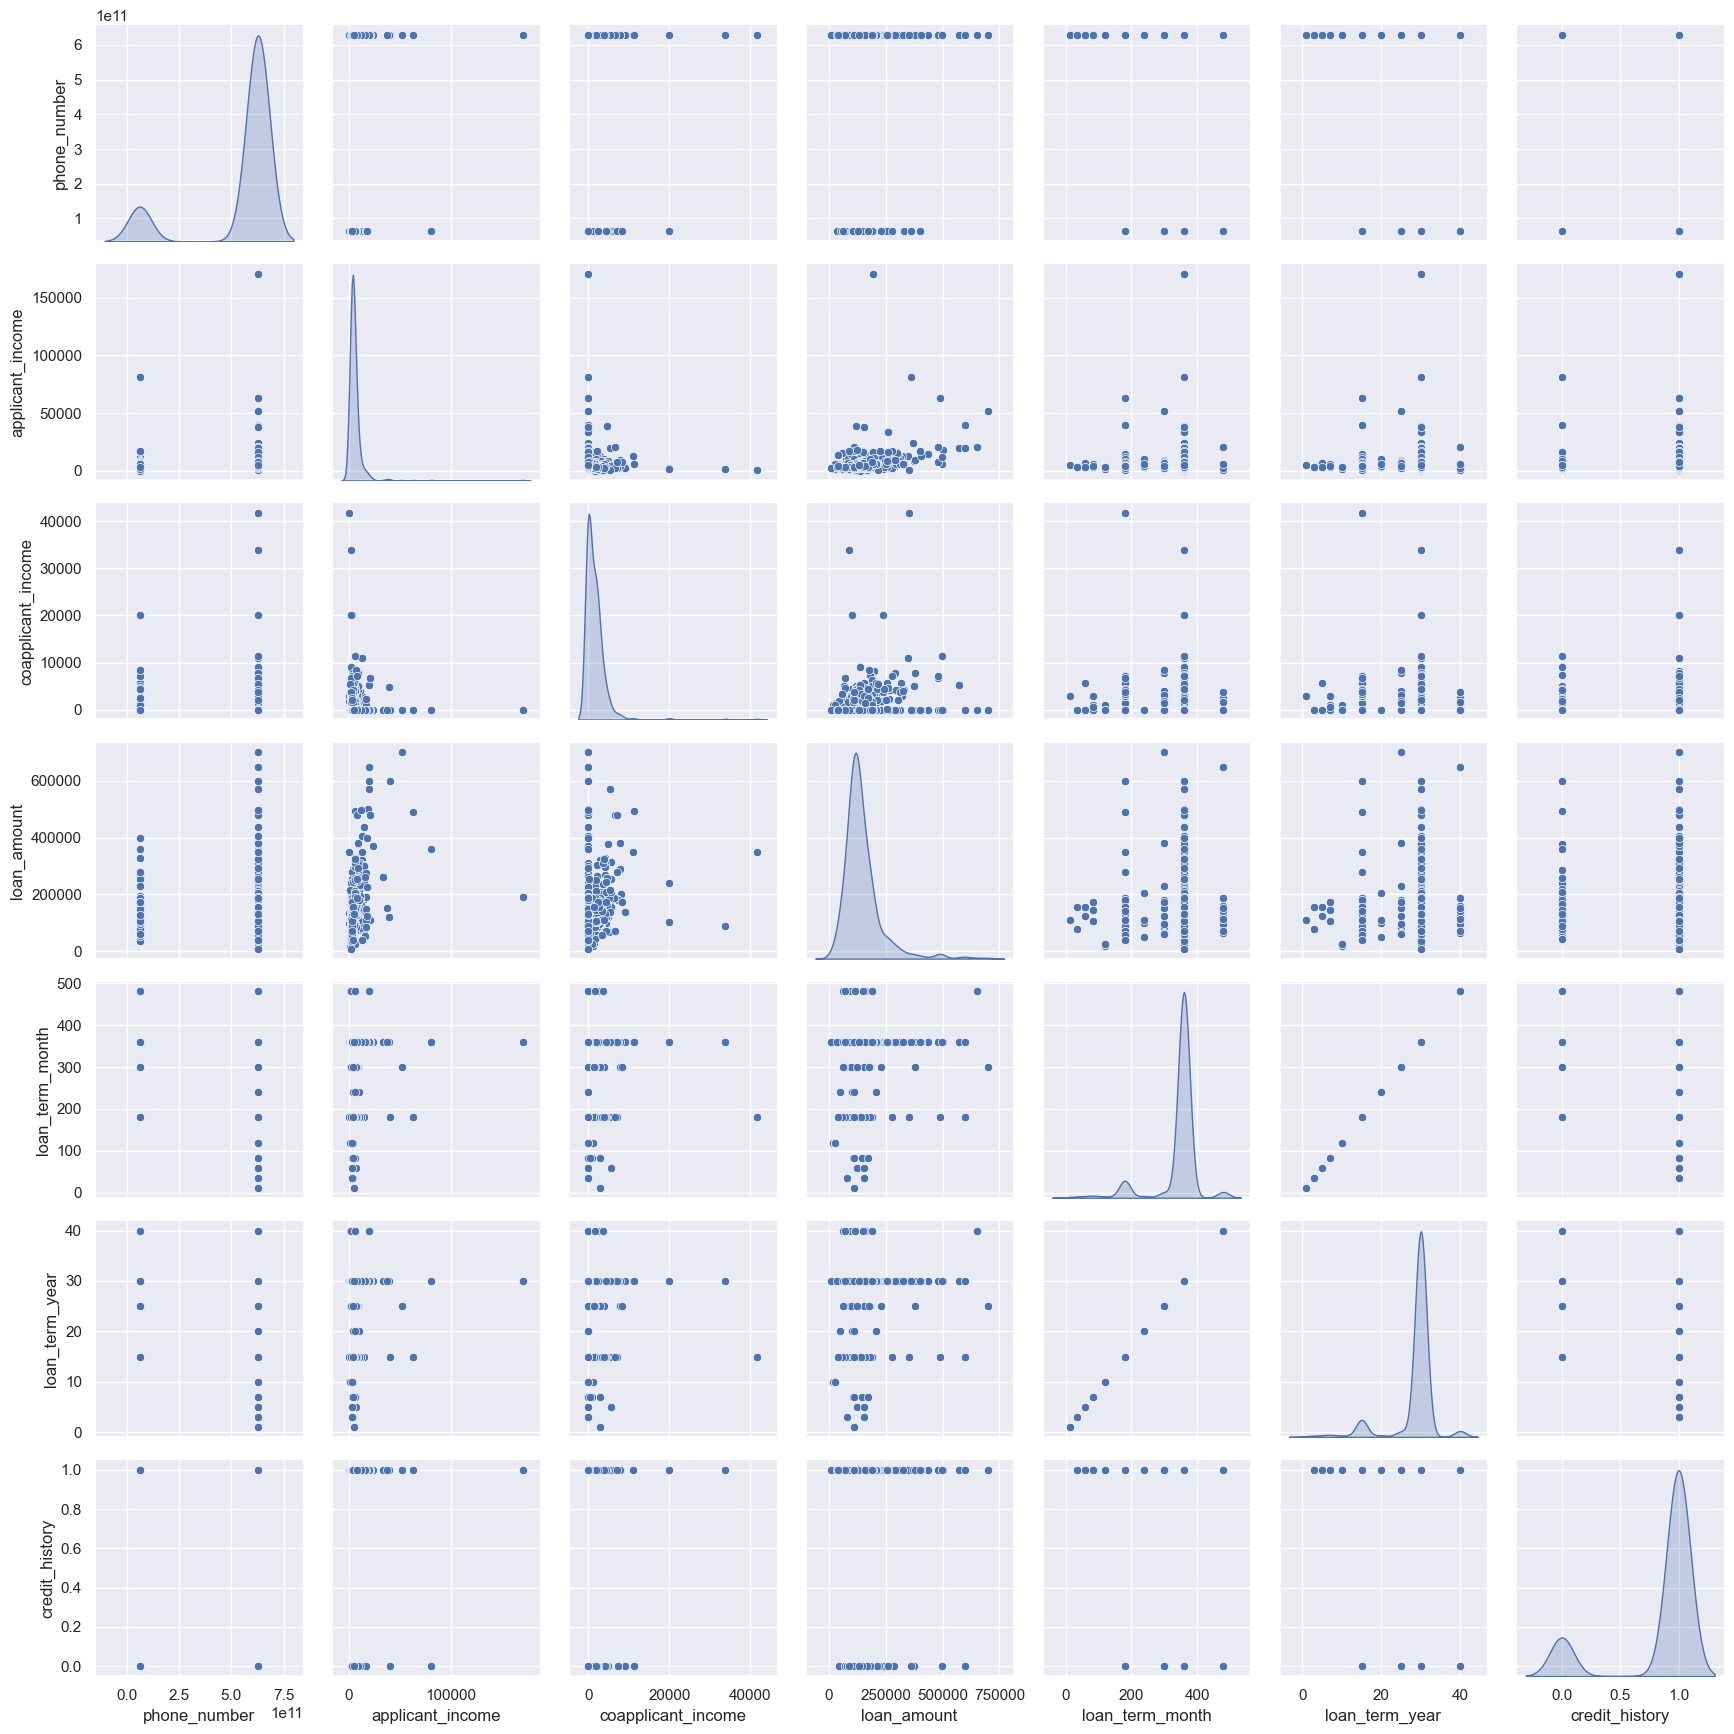

In [76]:
sns.pairplot(df_loan,
             diag_kind='kde')
plt.tight_layout()

# **3. Data Cleaning**

#### Repairing Datatype

In [78]:
df_loan['birth_date'] = pd.to_datetime(df_loan['birth_date'])
df_loan['phone_number'] = df_loan['phone_number'].astype(str)
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   loan_id             621 non-null    object        
 1   birth_date          572 non-null    datetime64[ns]
 2   phone_number        621 non-null    object        
 3   gender              608 non-null    object        
 4   married             618 non-null    object        
 5   dependents          605 non-null    object        
 6   education           620 non-null    object        
 7   self_employed       588 non-null    object        
 8   applicant_income    612 non-null    float64       
 9   coapplicant_income  621 non-null    float64       
 10  loan_amount         621 non-null    int64         
 11  loan_term_month     621 non-null    int64         
 12  loan_term_year      621 non-null    int64         
 13  credit_history      570 non-null    float64       

#### Handle Missing Values

In [79]:
# Informasi banyaknya missing values di tiap feature
df_loan.isnull().sum()

loan_id                 0
birth_date             49
phone_number            0
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

In [80]:
# melihat contoh missing values
df_loan[df_loan['gender'].isna()].sample(5)

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
581,LP002872,1980-06-14,628561347483.0,NaN,Yes,0,Graduate,No,3087.0,2210.0,136000,360,30,0.0,NaN,apartment,REJECT
337,LP002103,1981-04-13,628114726655.0,NaN,Yes,1,Graduate,Yes,9833.0,1833.0,182000,180,15,1.0,yes,house,APPROVE
465,LP002478,1986-10-29,62856026623.0,NaN,Yes,0,Graduate,Yes,2083.0,4083.0,160000,360,30,NaN,NaN,apartment,APPROVE
23,LP001050,1989-09-15,62857915239.0,NaN,Yes,2,Not Graduate,No,3365.0,1917.0,112000,360,30,0.0,NaN,studio,REJECT
482,LP002530,NaT,nan,NaN,Yes,2,Graduate,No,2873.0,1872.0,132000,360,30,0.0,NaN,apartment,REJECT


In [81]:
# Membuang kolom yang memiliki missing values terbanyak
df_loan.drop('has_credit_card', axis=1, inplace=True)

# Menghapus baris NaN
df_loan = df_loan.dropna()

# Melihat jumlah data
print(df_loan.info())
print('\nUkuran data : {}'.format(df_loan.shape))

<class 'pandas.core.frame.DataFrame'>
Index: 472 entries, 0 to 619
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   loan_id             472 non-null    object        
 1   birth_date          472 non-null    datetime64[ns]
 2   phone_number        472 non-null    object        
 3   gender              472 non-null    object        
 4   married             472 non-null    object        
 5   dependents          472 non-null    object        
 6   education           472 non-null    object        
 7   self_employed       472 non-null    object        
 8   applicant_income    472 non-null    float64       
 9   coapplicant_income  472 non-null    float64       
 10  loan_amount         472 non-null    int64         
 11  loan_term_month     472 non-null    int64         
 12  loan_term_year      472 non-null    int64         
 13  credit_history      472 non-null    float64       
 14 

#### Handling duplicated data

In [82]:
# Melihat contoh dan banyaknya data duplikat
duplicate_rows = df_loan[df_loan.duplicated()]
print(f'Banyaknya data duplikat : {df_loan.duplicated().sum()}\nDengan rincian sebagai berikut:')
duplicate_rows

Banyaknya data duplikat : 5
Dengan rincian sebagai berikut:


,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
90,LP001310,1987-10-18,628131021360.0,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,apartment,APPROVE
279,LP001904,1986-01-30,62811520563.0,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,house,APPROVE
308,LP001990,1980-08-03,628527921833.0,Male,No,0,Not Graduate,No,2000.0,0.0,119000,360,30,1.0,house,REJECT
363,LP002160,1990-11-27,628115255742.0,Male,Yes,3+,Graduate,No,5167.0,3167.0,200000,360,30,1.0,apartment,APPROVE
401,LP002277,1972-06-12,628138392877.0,Female,No,0,Graduate,No,3180.0,0.0,71000,360,30,0.0,house,REJECT


In [83]:
# Contoh data duplikat
print("Contoh data duplikat: ")
df_loan[df_loan['loan_id'] == 'LP001310']

Contoh data duplikat: 


,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
89,LP001310,1987-10-18,628131021360.0,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,apartment,APPROVE
90,LP001310,1987-10-18,628131021360.0,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,apartment,APPROVE


In [84]:
# Menghapus data duplikat
df_loan.drop_duplicates(inplace=True)

# Mengecek kembali apakah ada data duplikat
print(f'Banyaknya data duplikat : {df_loan.duplicated().sum()}')
print(f'Jumlah data setelah data duplikat dihapus : {len(df_loan)}')

Banyaknya data duplikat : 0
Jumlah data setelah data duplikat dihapus : 467


#### Handling Outlier

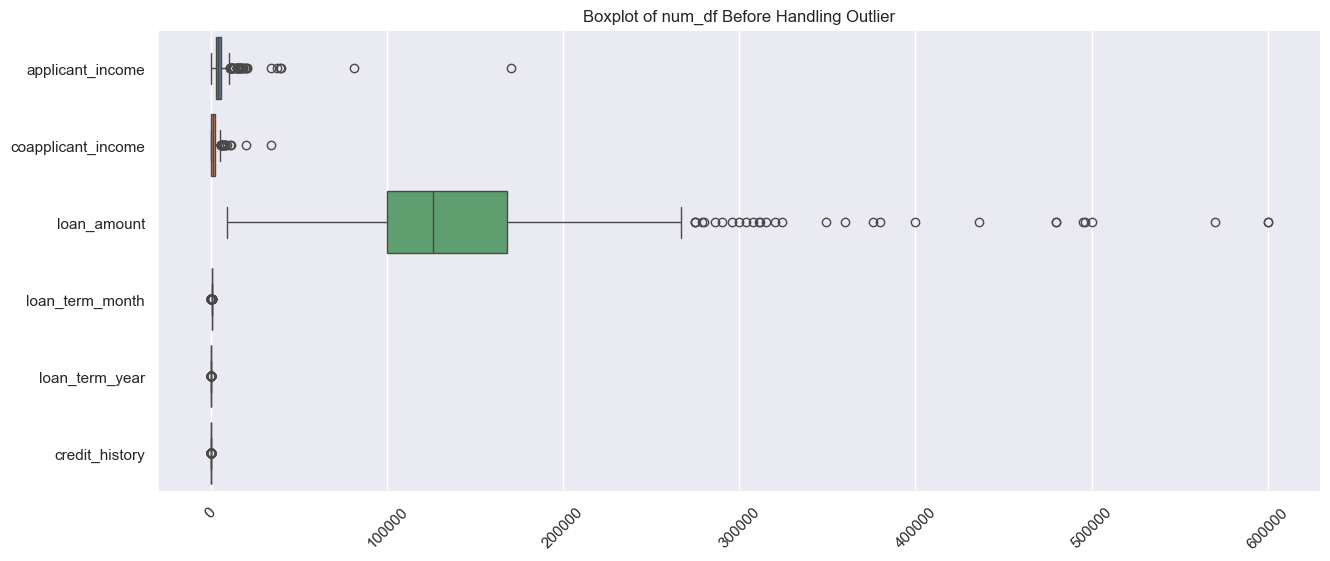

In [86]:
# before handling
num_df = ['applicant_income', 'coapplicant_income', 'loan_amount',
       'loan_term_month', 'loan_term_year', 'credit_history']

plt.figure(figsize=(15, 6))
sns.boxplot(data=df_loan[num_df], orient='h')
plt.title('Boxplot of num_df Before Handling Outlier')
plt.xticks(rotation=45)
plt.show()

In [87]:
def det_hand_iqr(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    
    low_lim = (q1 - 1.5 * iqr)
    upp_lim = (q3 + 1.5 * iqr)
    
    out_bool = (x < low_lim) | (x > upp_lim)
    outliers = x[out_bool]
    
    x = np.where(x >= upp_lim, upp_lim,
                 np.where(x <= low_lim,
                          low_lim,
                          x
                         )
                )
    
    return outliers,x

In [91]:
_,df_loan.applicant_income = det_hand_iqr(df_loan.applicant_income)
_,df_loan.coapplicant_income = det_hand_iqr(df_loan.coapplicant_income)
_,df_loan.loan_amount = det_hand_iqr(df_loan.loan_amount)

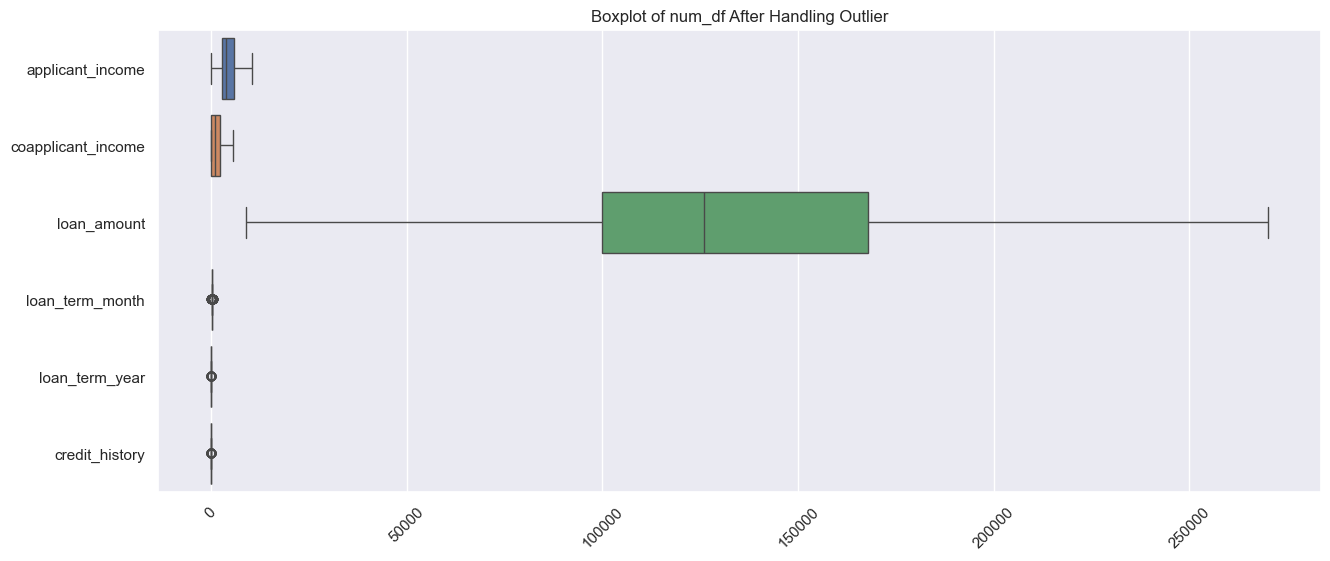

In [93]:
# after handling outlier

plt.figure(figsize=(15, 6))
sns.boxplot(data=df_loan[num_df], orient='h')
plt.title('Boxplot of num_df After Handling Outlier')
plt.xticks(rotation=45)
plt.show()

#### Feature Encoding

In [94]:
df_encode = df_loan.copy()

In [95]:
# pengecekan nilai/entri dari kolom-kolom kategorikal
cats_df = ['gender', 'married', 'dependents', 'education', 'self_employed', 'property_type']

for i in cats_df:
  print('Kolom',i,df_encode[i].unique())


Kolom gender ['Male' 'Female']
Kolom married ['No' 'Yes']
Kolom dependents ['0' '1' '2' '3+']
Kolom education ['Graduate' 'Not Graduate']
Kolom self_employed ['No' 'Yes']
Kolom property_type ['house' 'studio' 'apartment']


In [96]:
# Mapping cat_df

mapping_gender = {
    'Female' : 0,
    'Male' : 1
}

mapping_married = {
    'No' : 0,
    'Yes' : 1
}

mapping_education = {
    'Not Graduate' : 0,
    'Graduate' : 1
}

mapping_dependents = {
    '0' : 0,
    '1' : 1,
    '2' : 2,
    '3+' : 3
}

mapping_self_employed = {
    'No' : 0,
    'Yes' : 1
}

mapping_property_type = {
    'apartment' : 0,
    'house' : 1,
    'studio' : 2
}


df_encode['gender'] = df_encode['gender'].map(mapping_gender)
df_encode['married'] = df_encode['married'].map(mapping_married)
df_encode['education'] = df_encode['education'].map(mapping_education)
df_encode['self_employed'] = df_encode['self_employed'].map(mapping_self_employed)
df_encode['property_type'] = df_encode['property_type'].map(mapping_property_type)
df_encode['dependents'] = df_encode['dependents'].map(mapping_dependents)


In [97]:
df_encode.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,1977-05-15,628114203187.0,1,0,0,1,0,5849.0,0.0,100000.0,360,30,1.0,1,APPROVE
1,LP001003,1979-08-24,628776449212.0,1,1,1,1,0,4583.0,1508.0,128000.0,360,30,1.0,2,REJECT
2,LP001005,1991-03-28,628119240537.0,1,1,0,1,1,3000.0,0.0,66000.0,360,30,1.0,1,APPROVE
3,LP001006,1980-06-02,62856343702.0,1,1,0,0,0,2583.0,2358.0,120000.0,360,30,1.0,1,APPROVE
4,LP001008,1989-05-19,628113008687.0,1,0,0,1,0,6000.0,0.0,141000.0,360,30,1.0,1,APPROVE


# **4. Bussiness Insight**

#### Analisis minat pelanggan berdasarkan pada tipe properti

In [98]:
# Banyaknya peminat tiap properti
peminat_gender = df_loan.groupby( ['gender','property_type'] )['loan_id'].count().reset_index()
peminat_gender.columns =['gender', 'property_type', 'count']
print('Peminat tiap properti berdasarkan gender :')
peminat_gender

Peminat tiap properti berdasarkan gender :


,gender,property_type,count
0,Female,apartment,41
1,Female,house,23
2,Female,studio,18
3,Male,apartment,142
4,Male,house,127
5,Male,studio,116


Hasil Analisis:
Properti apartemen diminati oleh pelanggan perempuan dan laki-laki

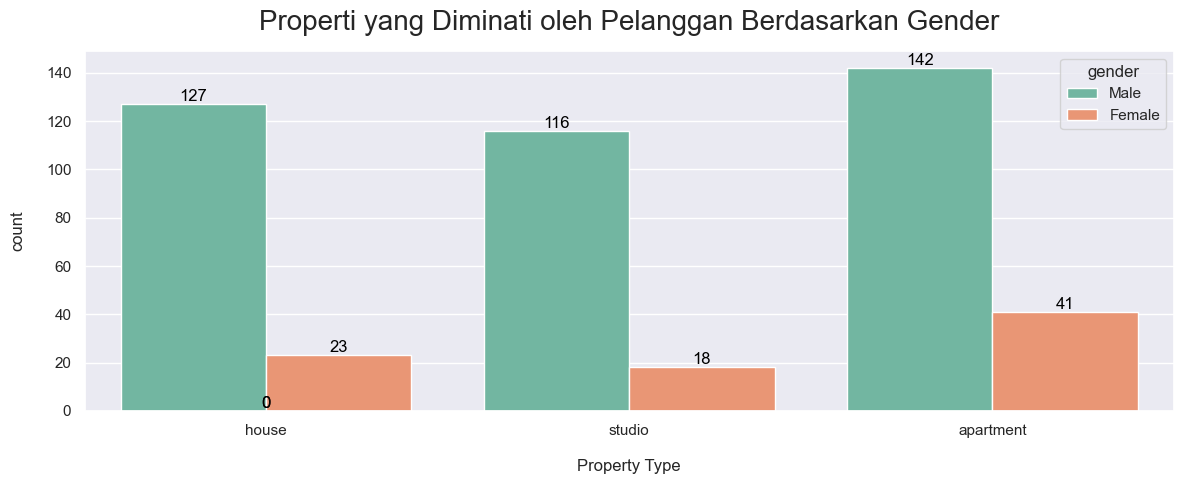

In [102]:
# Visualisasi peminat properti berdasarkan gender
sns.set(style='darkgrid')
f, ax = plt.subplots(1,1,figsize=(12,5))
sns.countplot(x = 'property_type', data = df_loan, hue ='gender', palette = 'Set2')

for bar in ax.patches:
  bar_value = bar.get_height()
  text = f'{int(bar_value)}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value
  bar_color = bar.get_facecolor()
  ax.text(text_x,text_y, text, ha='center', va='bottom', color='black', size = 12)

ax.set_xlabel('Property Type', labelpad=15)
ax.set_ylabel('count', labelpad=15)
ax.set_title('Properti yang Diminati oleh Pelanggan Berdasarkan Gender', pad=15, size=20)
plt.tight_layout()


C:\Users\Dewi Oka\AppData\Local\Temp\ipykernel_4048\2158012250.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'property_type', data = df_loan, palette = 'Set2')


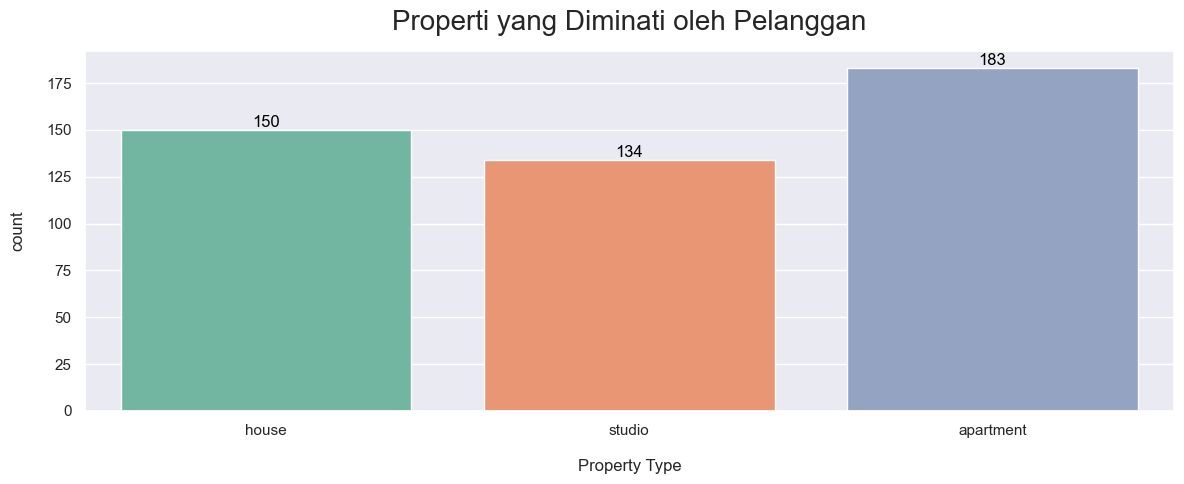

In [107]:
# Visualisasi peminat properti
sns.set(style='darkgrid')
f, ax = plt.subplots(1,1,figsize=(12,5))
sns.countplot(x = 'property_type', data = df_loan, palette = 'Set2')

for bar in ax.patches:
  bar_value = bar.get_height()
  text = f'{int(bar_value)}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value
  bar_color = bar.get_facecolor()
  ax.text(text_x,text_y, text, ha='center', va='bottom', color='black', size = 12)

ax.set_xlabel('Property Type', labelpad=15)
ax.set_ylabel('count', labelpad=15)
ax.set_title('Properti yang Diminati oleh Pelanggan', pad=15, size=20)
plt.tight_layout()


#### Analisis pengaruh status perkawinan terhadap jangka waktu meminjam

In [108]:
# Pengaruh status perkawinan terhadap jangka waktu meminjam
peminat_married = df_loan.groupby('married')['loan_id'].count().reset_index()
married_year =  df_loan.groupby( ['married', 'loan_term_year'] )['loan_id'].count().reset_index()

peminat_married.columns = ['Married Status', 'count']
married_year.columns = ['Married Status', 'Loan term (year)', 'count' ]

print('Jumlah peminjam berdasarkan status pernikahan :')
peminat_married

Jumlah peminjam berdasarkan status pernikahan :


,Married Status,count
0,No,167
1,Yes,300


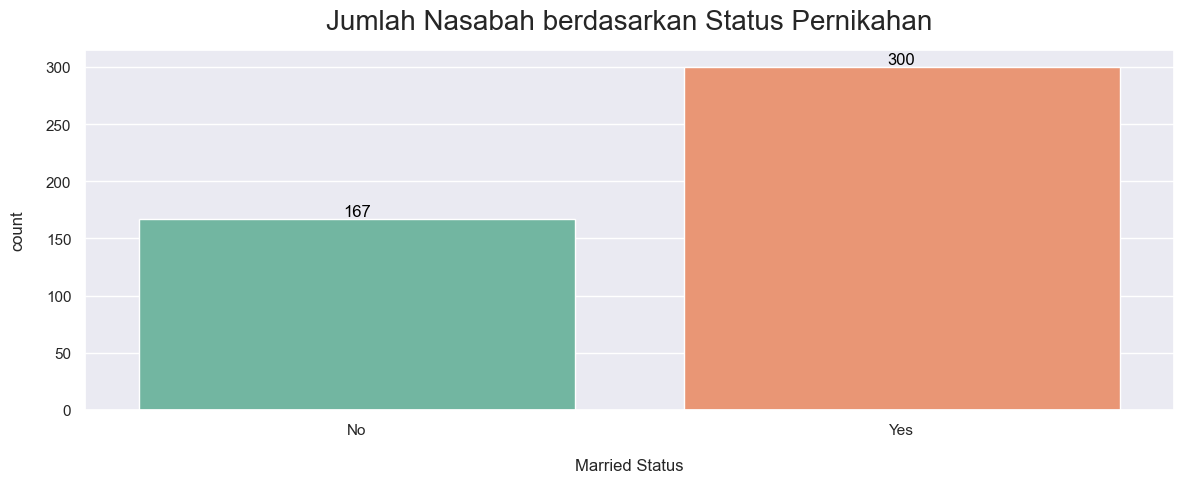

In [110]:
# Visualisasi peminat properti berdasarkan gender
sns.set(style='darkgrid')
f, ax = plt.subplots(1,1,figsize=(12,5))
sns.countplot(x = 'married', data = df_loan, hue ='married', palette = 'Set2')

for bar in ax.patches:
  bar_value = bar.get_height()
  text = f'{int(bar_value)}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value
  bar_color = bar.get_facecolor()
  ax.text(text_x,text_y, text, ha='center', va='bottom', color='black', size = 12)

ax.set_xlabel('Married Status', labelpad=15)
ax.set_ylabel('count', labelpad=15)
ax.set_title('Jumlah Nasabah berdasarkan Status Pernikahan', pad=15, size=20)
plt.tight_layout()

In [111]:
print('Jumlah peminjam berdasarkan jangka waktu dan status pernikahan :')
married_year

Jumlah peminjam berdasarkan jangka waktu dan status pernikahan :


,Married Status,Loan term (year),count
0,No,3,2
1,No,5,1
2,No,10,1
3,No,15,4
4,No,25,3
5,No,30,150
6,No,40,6
7,Yes,5,1
8,Yes,7,3
9,Yes,10,2


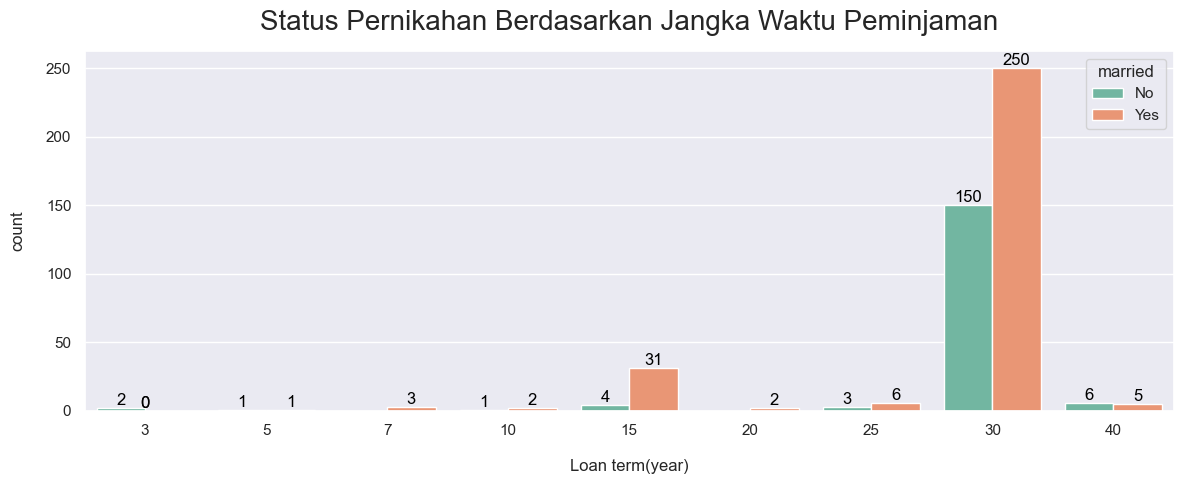

In [113]:
# Visualisasi jangka peminjam dengan status pernikahan
sns.set(style='darkgrid')
f, ax = plt.subplots(1,1,figsize=(12,5))
sns.countplot(x = 'loan_term_year', data = df_loan, hue ='married', palette = 'Set2')

for bar in ax.patches:
  bar_value = bar.get_height()
  text = f'{int(bar_value)}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value
  bar_color = bar.get_facecolor()
  ax.text(text_x,text_y, text, ha='center', va='bottom', color='black', size = 12)

ax.set_xlabel('Loan term(year)', labelpad=15)
ax.set_ylabel('count', labelpad=15)
ax.set_title('Status Pernikahan Berdasarkan Jangka Waktu Peminjaman', pad=15, size=20)
plt.tight_layout()


C:\Users\Dewi Oka\AppData\Local\Temp\ipykernel_4048\3160843462.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'loan_term_year', data = df_loan, palette = 'Set2')


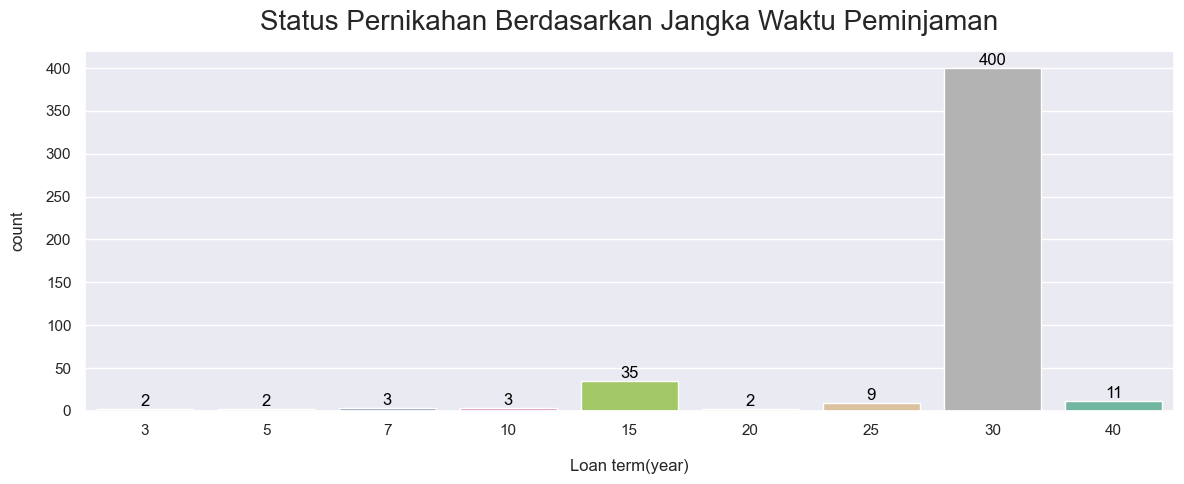

In [114]:
# Visualisasi jangka peminjam dengan status pernikahan
sns.set(style='darkgrid')
f, ax = plt.subplots(1,1,figsize=(12,5))
sns.countplot(x = 'loan_term_year', data = df_loan, palette = 'Set2')

for bar in ax.patches:
  bar_value = bar.get_height()
  text = f'{int(bar_value)}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value
  bar_color = bar.get_facecolor()
  ax.text(text_x,text_y, text, ha='center', va='bottom', color='black', size = 12)

ax.set_xlabel('Loan term(year)', labelpad=15)
ax.set_ylabel('count', labelpad=15)
ax.set_title('Status Pernikahan Berdasarkan Jangka Waktu Peminjaman', pad=15, size=20)
plt.tight_layout()
